In [1]:
import pandas as pd

df = pd.read_csv('emails.csv')

In [2]:
print(df.columns)
print(df.head())
print(df['Prediction'].value_counts())

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)
  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0     

In [3]:
X = df.drop(columns= ['Prediction','Email No.'])
y = df['Prediction']

In [4]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score , confusion_matrix

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

print("-------svc----------")
print("accuracy: ", accuracy_score(y_test,knn_pred))
print("confusion matrix: \n", confusion_matrix(y_test,knn_pred))
print("classification report: \n", classification_report(y_test,knn_pred))

-------svc----------
accuracy:  0.8628019323671497
confusion matrix: 
 [[646  93]
 [ 49 247]]
classification report: 
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       739
           1       0.73      0.83      0.78       296

    accuracy                           0.86      1035
   macro avg       0.83      0.85      0.84      1035
weighted avg       0.87      0.86      0.87      1035



In [6]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

print("-------svc----------")
print("accuracy: ", accuracy_score(y_test,svm_pred))
print("confusion matrix: \n", confusion_matrix(y_test,svm_pred))
print("classification report: \n", classification_report(y_test,svm_pred))

-------svc----------
accuracy:  0.9594202898550724
confusion matrix: 
 [[715  24]
 [ 18 278]]
classification report: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       739
           1       0.92      0.94      0.93       296

    accuracy                           0.96      1035
   macro avg       0.95      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035



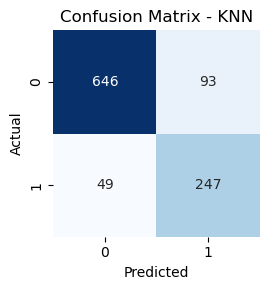

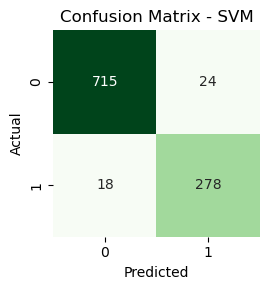

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Confusion Matrix for KNN
# -----------------------------
cm_knn = confusion_matrix(y_test, knn_pred)

plt.figure(figsize=(4,3))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# -----------------------------
# Confusion Matrix for SVM
# -----------------------------
cm_svm = confusion_matrix(y_test, svm_pred)

plt.figure(figsize=(4,3))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', cbar=False, square=True)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
